In [ ]:
"""SANITY CHECK FOR:
1) LID estimation: check whether the high LID images actually look more complex
2) reconstruction loss: check the organization of batches.
"""

'sanity check LID estimation: check whether the high LID images actually look more complex'

In [ ]:
import json
import numpy as np

In [16]:
from data.utils.dataloaders import get_imagenet_dataloader
imagenet = get_imagenet_dataloader(split="train")

/BS/data_mani_compress/work/miniforge3/envs/dgm_geometry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/BS/data_mani_compress/work/miniforge3/envs/dgm_geometry/lib/python3.11/site-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 64 worker processes in total. Our suggested max number of worker in current system is 20, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [3]:
# read json files of LID 
with open('imageNet_LID_values/training_set/lid_15_0000_0050.json', 'r') as f:
    lid_1 = json.load(f)

with open('imageNet_LID_values/training_set/lid_15_0050_0500.json', 'r') as f:
    lid_2 = json.load(f)

with open('imageNet_LID_values/training_set/lid_15_0500_1000.json', 'r') as f:
    lid_3 = json.load(f)

with open('imageNet_LID_values/training_set/lid_15_1000_1500.json', 'r') as f:
    lid_4 = json.load(f)


In [4]:
lids = lid_1 + lid_2 + lid_3 + lid_4 # combine all LID values

In [ ]:
# find the indices of lowest and highest LID values
lids_sorted = sorted(lids)
lowest_index = lids.index(lids_sorted[:10])
highest_index = lids.index(lids_sorted[-10:])

In [6]:
print(lowest_index, lids[lowest_index])
print(highest_index, lids[highest_index])

3856 -7138918.0
23310 -2252388.0


In [ ]:
from data.utils.dataloaders import get_imagenet_dataloader
imagenet = get_imagenet_dataloader(split="train")

/BS/data_mani_compress/work/miniforge3/envs/dgm_geometry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/BS/data_mani_compress/work/miniforge3/envs/dgm_geometry/lib/python3.11/site-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 64 worker processes in total. Our suggested max number of worker in current system is 20, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.2565577].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8096584..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6051416].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0151556..2.622571].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.622571].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.535425].
Cl

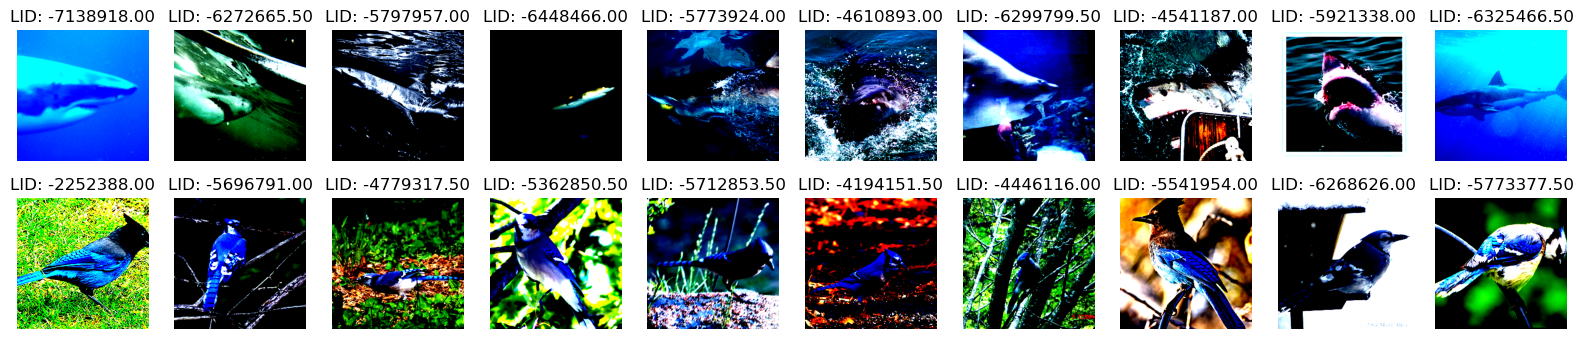

In [9]:
# show images with lowest and highest LID values
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 10, figsize=(20, 4))
for i in range(10):
    axs[0, i].imshow(imagenet.dataset[lowest_index + i][0].permute(1, 2, 0))
    axs[0, i].axis('off')
    axs[0, i].set_title(f'LID: {lids[lowest_index + i]:.2f}')
    
    axs[1, i].imshow(imagenet.dataset[highest_index + i][0].permute(1, 2, 0))
    axs[1, i].axis('off')
    axs[1, i].set_title(f'LID: {lids[highest_index + i]:.2f}')